# Prediction of no. of air passengers using ARIMA model

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.metrics import mean_squared_error
from time import time

pd.set_option('display.max_rows', 500)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

##### Time Series Analysis

Across industries, organizations commonly use time series data, which means any information collected over a regular interval of time, in their operations. Examples include daily stock prices, energy consumption rates, social media engagement metrics and retail demand, among others. Analyzing time series data yields insights like trends, seasonal patterns and forecasts into future events that can help generate profits. For example, by understanding the seasonal trends in demand for retail products, companies can plan promotions to maximize sales throughout the year

### Question 2: Air Passengers dataset

##### Section 2.1 - Loading the Dataset and Plotting

a. Load the dataset from AirPassengers.csv file using pandas read_csv and print the first five rows

b. Plot a lineplot using Seaborn with x-axis being the time and y-axis being the passenger count

c. Plot the ACF plot for num_passengers column using 50 lags

d. Plot the PACF plot for num_passengers column using the 'ywm' method

In [4]:
from datetime import datetime
def parser(s):
    return datetime.strptime(s,'%Y-%m')

# Write your code here for 2.1a below

df = pd.read_csv("AirPassengers_v2.csv")

df.head()

,Month,numPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

df.head()

,Month,numPassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


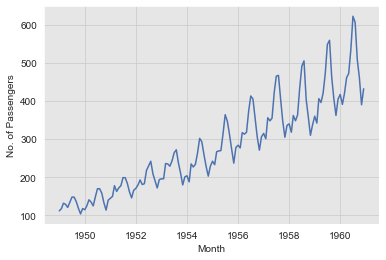

In [6]:
# Write your code for 2.1b below

sns.lineplot(x = df["Month"], y = df["numPassengers"] )

plt.ylabel("No. of Passengers")

plt.show()

In [7]:
#uncomment and use
#df=df.asfreq(pd.infer_freq(df.index))

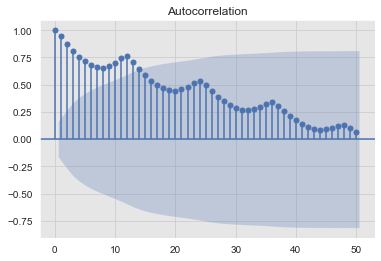

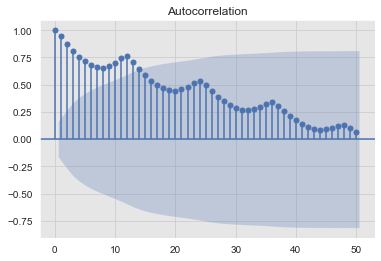

In [8]:
# Write your code for 2.1c below

plot_acf(df["numPassengers"], lags = 50)

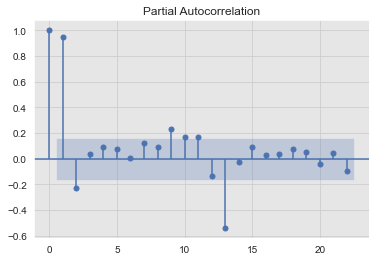

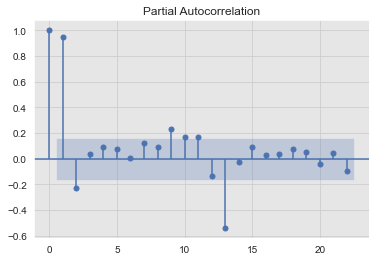

In [9]:
# Write your code for 2.1d below

plot_pacf(df["numPassengers"], method = "ywm")

#### Section 2.2
<br>

a. Split the data into training and test sets and visualize the data

Note: All values earlier than date 1958-12-1 are to be training set and the remainder to be test-set

b. Plot the train-test split data



In [10]:
# Write your code for 2.2a below

df1 = df.set_index(df['Month'], inplace = False)
df1.drop('Month', axis=1, inplace=True)
df1

# Create train and test sets

train = df1[:'1958-11-01']
test  = df1['1958-12-01':]
print('Train Dataset:', train.shape)
print('Test Dataset:', test.shape)

Train Dataset: (119, 1)
Test Dataset: (25, 1)


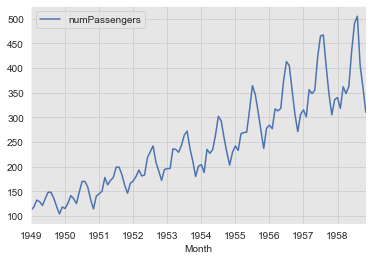

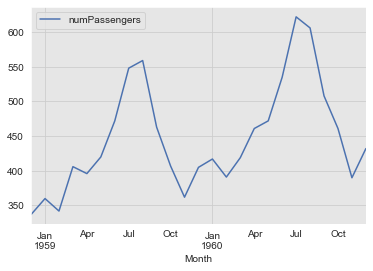

In [11]:
# Write your code for 2.2b below

train.plot(y='numPassengers')
plt.show()

test.plot(y='numPassengers')
plt.show()

#### Section 2.3
<br>
a. Build an ARIMA model on train data with order of (15,2,2)
<br>
b. Fit the model to the data
<br>
c. Print a summary of the model
<br>
d. Predict on the test set
<br>
e. Plot the training data and test data and overlay the predicted data on the same plot

In [12]:
# Write your code for 2.3a below

model = ARIMA(train, order = (15, 2, 2))

C:\Users\muhdn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\muhdn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\muhdn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [13]:
# Write your code for 2.3b below
model_fit = model.fit()

C:\Users\muhdn\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
# Write your code for 2.3c below
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          numPassengers   No. Observations:                  119
Model:                ARIMA(15, 2, 2)   Log Likelihood                -443.983
Date:                Mon, 24 Jan 2022   AIC                            923.966
Time:                        22:44:18   BIC                            973.685
Sample:                    01-01-1949   HQIC                           944.151
                         - 11-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7547      1.036     -0.729      0.466      -2.785       1.275
ar.L2         -0.1347      1.389     -0.097      0.923      -2.856       2.587
ar.L3         -0.0760      1.444     -0.053      0.9

In [15]:
# Write your code for 2.3d below

pred_start_date = test.index[0]
pred_end_date = test.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

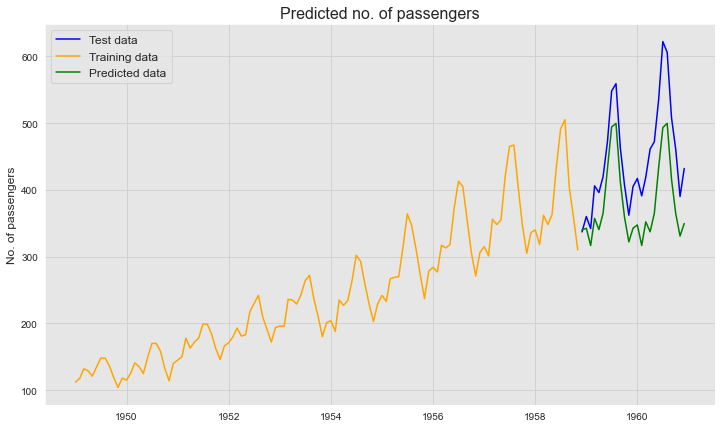

In [16]:
# Write your code for 2.3e below

plt.figure(figsize=(12,7))

plt.plot(test, color='blue')

plt.plot(train, color='orange')

plt.plot(predictions, color='green')

plt.legend(('Test data', 'Training data', 'Predicted data'), fontsize=12)

plt.title('Predicted no. of passengers', fontsize=16)

plt.ylabel('No. of passengers', fontsize=12)

plt.show()

##### Section 2.4 - Stationarity Tests - Rolling Mean
Calculate the 7-month rolling mean and overlay it against the above plot. Based on the trend of the rolling mean, does the series exhibit stationarity?

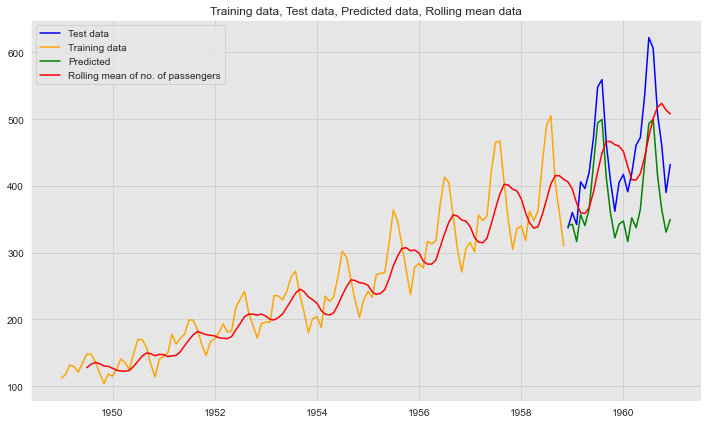

The series does not exhibit stationarity based on the trend of the rolling mean.


In [17]:
# Write your code for 2.4 below

plt.figure(figsize=(12,7))

rolling_mean = df1.rolling(7).mean()

plt.plot(test, color='blue', label='Test data')

plt.plot(train, color='orange', label='Training data')

plt.plot(predictions, color='green', label='Predicted')

plt.plot(rolling_mean, color='red', label='Rolling mean of no. of passengers')

plt.title('Training data, Test data, Predicted data, Rolling mean data')

plt.legend(loc='best')

plt.show()

print ('The series does not exhibit stationarity based on the trend of the rolling mean.')

###### Section 2.5 - Stationarity Tests - Augmented Dickey Fuller Test

ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

a. Perform the augmented Dickey-Fuller test from the statsmodels package using AIC as the auto-lag parameter

b. Print the p-value, test statistic, no of lags used

c. Does the series exhibit stationarity?

In [18]:
# Write your code for 2.5a below

adft = adfuller(df1,autolag='AIC')

In [20]:
# Write your code for 2.5b below

result_df = pd.DataFrame({'Evaluation metrics':['Test statistic','p-value','No. of lags used','Number of observations used',
'Critical value (1%)', 'Critical value (5%)', 'Critical value (10%)'],'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})

result_df

,Evaluation metrics,Values
0,Test statistic,0.815369
1,p-value,0.991880
2,No. of lags used,13.000000
3,Number of observations used,130.000000
4,Critical value (1%),-3.481682
5,Critical value (5%),-2.884042
6,Critical value (10%),-2.578770


In [21]:
# Write your code for 2.5c below

print ("The series is not stationary since the null hypothesis is not rejected as the p-value (0.992) is greater than 0.05 and the Test statistic (0.815) is greater than all the Critical values.")

The series is not stationary since the null hypothesis is not rejected as the p-value (0.992) is greater than 0.05 and the Test statistic (0.815) is greater than all the Critical values.


##### Section 2.6

Perform the 1-month, 3-month, 6-month and 9-month autocorrelations (hint: autocorr(lag=))

Based on the auto-correlation values, is the series a good-candidate for timeseries trend based forecasts?¶

In [22]:
# Write your code for 2.6 below

autocorrelation_lag1 = df1['numPassengers'].autocorr(lag=1)                          
print('1-month lag: ', autocorrelation_lag1)
                          
autocorrelation_lag3 = df1['numPassengers'].autocorr(lag=3)
print('3-month lag: ', autocorrelation_lag3)

autocorrelation_lag6 = df1['numPassengers'].autocorr(lag=6)
print('6-month lag: ', autocorrelation_lag6)

autocorrelation_lag9 = df['numPassengers'].autocorr(lag=9)
print('9-month lag: ', autocorrelation_lag9)
print()
print('Even with a 9-month lag, the data is highly autocorrelated. Hence, the series is indeed a good candidate for timeseries trend based forecasts.')

1-month lag:  0.9601946480498524
3-month lag:  0.8373947650817942
6-month lag:  0.7839187959206184
9-month lag:  0.8278519011167601

Even with a 9-month lag, the data is highly autocorrelated. Hence, the series is indeed a good candidate for timeseries trend based forecasts.


#### Section 2.7 
Trend Decomposition using seasonal_decompose from statsmodel 
<br>
Does the time-series data exhibit trend and seasonality?

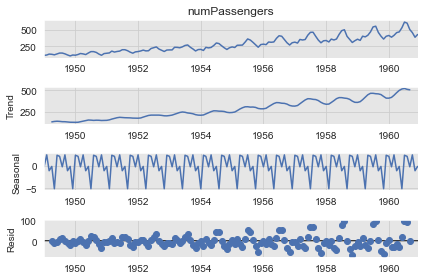

The time-series data exhibits trend and seasonality. There is an increasing trend in the no. of passengers and there is seasonality due to the rise and fall in no. of passengers every year.


In [23]:
# Write your code for 2.7 below

decompose = seasonal_decompose(df1['numPassengers'],model='additive', period=7)

decompose.plot()

plt.show()

print('The time-series data exhibits trend and seasonality. There is an increasing trend in the no. of passengers and there is seasonality due to the rise and fall in no. of passengers every year.')

##### Section 2.8

a. Split the data into training and test sets and visualize the data

 Note: All values earlier than date 1960-08 are to be training set and the remainder to be test-set

b. Plot the train-test split data

##### Hints:

df['Date'] = df.index

Set a new dataframe named train to be the Original dataframe where the Date column is less than a datetime object of value 01 Jan 1960

train = df[...] < ...

Similary for the test set:

test = df [...] > ....

Plot the train set using black and the test set using red

In [24]:
# Write your code for 2.8a below

df2 = df1.copy()

df2['Date'] = df2.index

train1 = df2[df2['Date'] < pd.to_datetime('1960-08', format='%Y-%m')]

train1['train'] = train1['numPassengers']

del train1['Date']

del train1['numPassengers']

test1 = df2[df2['Date'] >= pd.to_datetime('1960-08', format='%Y-%m')]

del test1['Date']

test1['test'] = test1['numPassengers']

del test1['numPassengers']

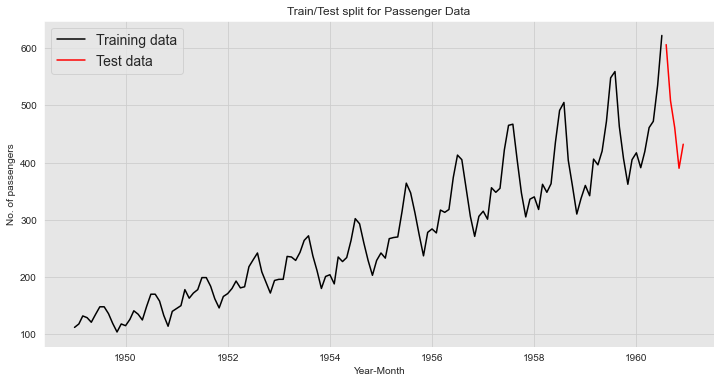

In [25]:
# Write your code for 2.8b below

plt.figure(figsize=(12,6))

plt.plot(train1, color = 'black')

plt.plot(test1, color = 'red')

plt.title('Train/Test split for Passenger Data')

plt.ylabel('No. of passengers')

plt.xlabel('Year-Month')

plt.legend(('Training data', 'Test data'), fontsize=14)

sns.set()

plt.show()

##### Section 2.9

Use auto-arima to build a model to fit on the training set

Perform predictions on the test set using the above model

model = auto_arima(...)

model.fit(...)

forecast = model.predict(n_periods...)

forecast = pd.DataFrame(forecast,index = ...,columns=['Prediction'])

In [26]:
# Write your code for 2.9 below

model = auto_arima(train1, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(train1)

forecast = model.predict(n_periods=len(test1))

forecast = pd.DataFrame(forecast,index = test1.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

##### Section 2.10

Plot the actual time-series and overlay it with the predicted values in the test set¶

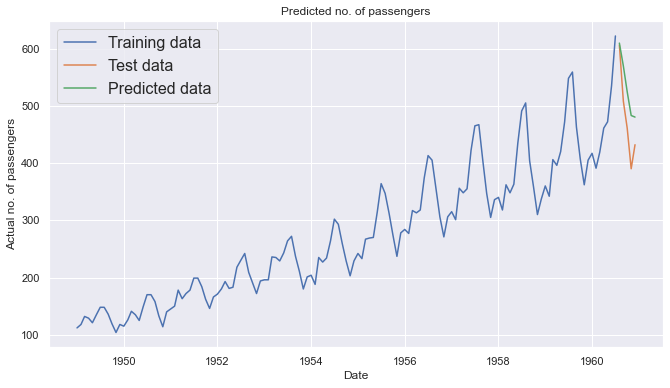

In [27]:
# Write your code for 2.10 below

plt.figure(figsize=(11,6))

plt.plot(train1, label='Training data')

plt.plot(test1, label='Test data')

plt.plot(forecast, label='Predicted data')

plt.title('Predicted no. of passengers')

plt.xlabel('Date')

plt.ylabel('Actual no. of passengers')

plt.legend(loc='upper left', fontsize=16)

plt.show()